### В данном уроке мы выделим еще несколько потенциально важных фичей из изначального датасета и попробуем применить изученные методы отбора признаков к итоговому датасету.

In [1]:
import numpy as np
import pandas as pd

processed_data = pd.read_csv('processed_data.csv', index_col='id')

processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration
id,,,,,
id2875421,1,930.399753,0,1.500479,6.122493
id2377394,0,930.399753,0,1.807119,6.498282
id3858529,1,930.399753,0,6.392080,7.661527
id3504673,1,930.399753,0,1.487155,6.063785
id2181028,1,930.399753,0,1.189925,6.077642


In [2]:
initial_data = pd.read_csv('taxi_dataset.csv')

initial_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


In [3]:
initial_data.shape[0] == processed_data.shape[0]

True

In [4]:
### Вернем в датасет колонку pickup_datetime

initial_data = initial_data.set_index('id')

processed_data = pd.merge(processed_data, initial_data['pickup_datetime'],
                          left_index=True, right_index=True)

In [5]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime
id,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55


Напомним, **pickup_datetime** - время начала поездки.

Кажется, что в зависимости от месяца/дня недели/времени суток движение на дорогах может отличаться. Как из-за погодных условий, так и из-за загруженности транспорта. Поэтому, есть подозрение, что будет полезно выделить ряд признаков из колонки **pickup_datetime**. Давайте исследуем зависимость нашей таргетной переменной от указанных факторов.

In [6]:
processed_data['pickup_datetime'] = pd.to_datetime(processed_data['pickup_datetime'])

processed_data['date'] = processed_data.pickup_datetime.dt.date
processed_data['day_of_week'] = processed_data.pickup_datetime.dt.dayofweek
processed_data['hour'] = processed_data.pickup_datetime.dt.hour
processed_data['month'] = processed_data.pickup_datetime.dt.month

In [7]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


Исследуем, когда и сколько поездок было совершено. 

Начнем с графиков, показывающих количество поездок в зависимости от времени суток/даты и т.д.

Так же полезно сразу показать и среднее значение таргетной переменной.

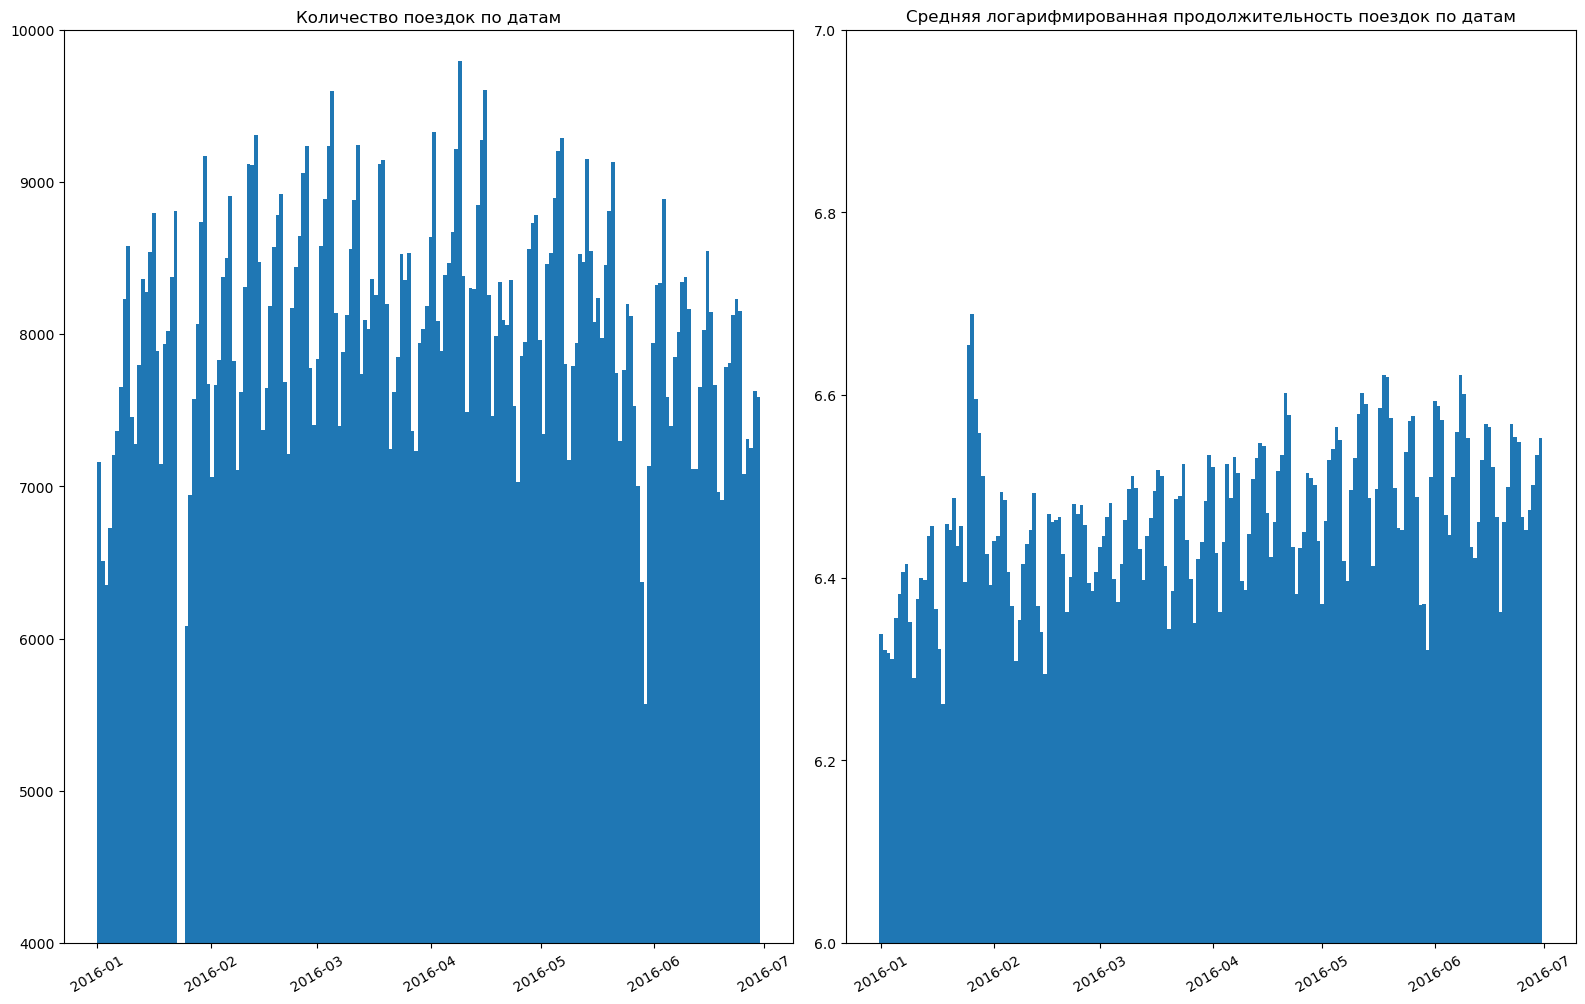

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['date'], bins=processed_data.date.unique().shape[0])
plt.ylim((4000, 10000))
plt.xticks(rotation=30)

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['date'].unique())), 
        processed_data.groupby('date', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))
plt.xticks(rotation=30)

fig.tight_layout()

ax_1.set(title = 'Количество поездок по датам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по датам')
plt.show()

Кажется, что внутри недели есть некоторая зависимость таргета от дня недели. 

Такая же зависимость может оказаться и внутри дня (в завимости от часов).

Предлагаю исследовать эту зависимость подробнее.

Изобразите следующие графики зависимостей:

- Количество поездок/Средняя продолжительность поездки vs День недели
- Количество поездок/Средняя продолжительность поездки vs время суток
- Средняя продолжительность поездки vs время суток для каждого дня недели (например, нарисовав с разными цветами и, соответственно, легендами)
- Аналогичные графики, используя информацию о месяце, внутри которого была совершена поездка.
- Ящики с усами для различных: времени суток, дня недели, месяца

Используйте любые доступные инструменты pyplot!

Далее, на основе полученных результатов, мы будем принимать решение о создании новых признаков.

EDA можно использовать не только для того, чтобы понять, какие фичи можно убрать из датасета. Но и для выделения базовых признаков. Этим и займемся!

P.S. Сами графики мы проверять у Вас не будем. Зато для ответа на устные вопросы понадобятся, поэтому, в любом случае, крайне рекомендуем поупражняться. Поэтому рисовать все графики не обязательно - ограничьтесь теми, которые помогут Вам ответить на тестовые вопросы.

**Hint**: обратите внимание на сильную просадку в январе. Почему она могла произойти - можно прочитать <a href="https://en.wikipedia.org/wiki/January_2016_United_States_blizzard"> здесь</a>. В будущем можно будет создать бинарный признак "произошла ли поездка во время сильного снегопада".


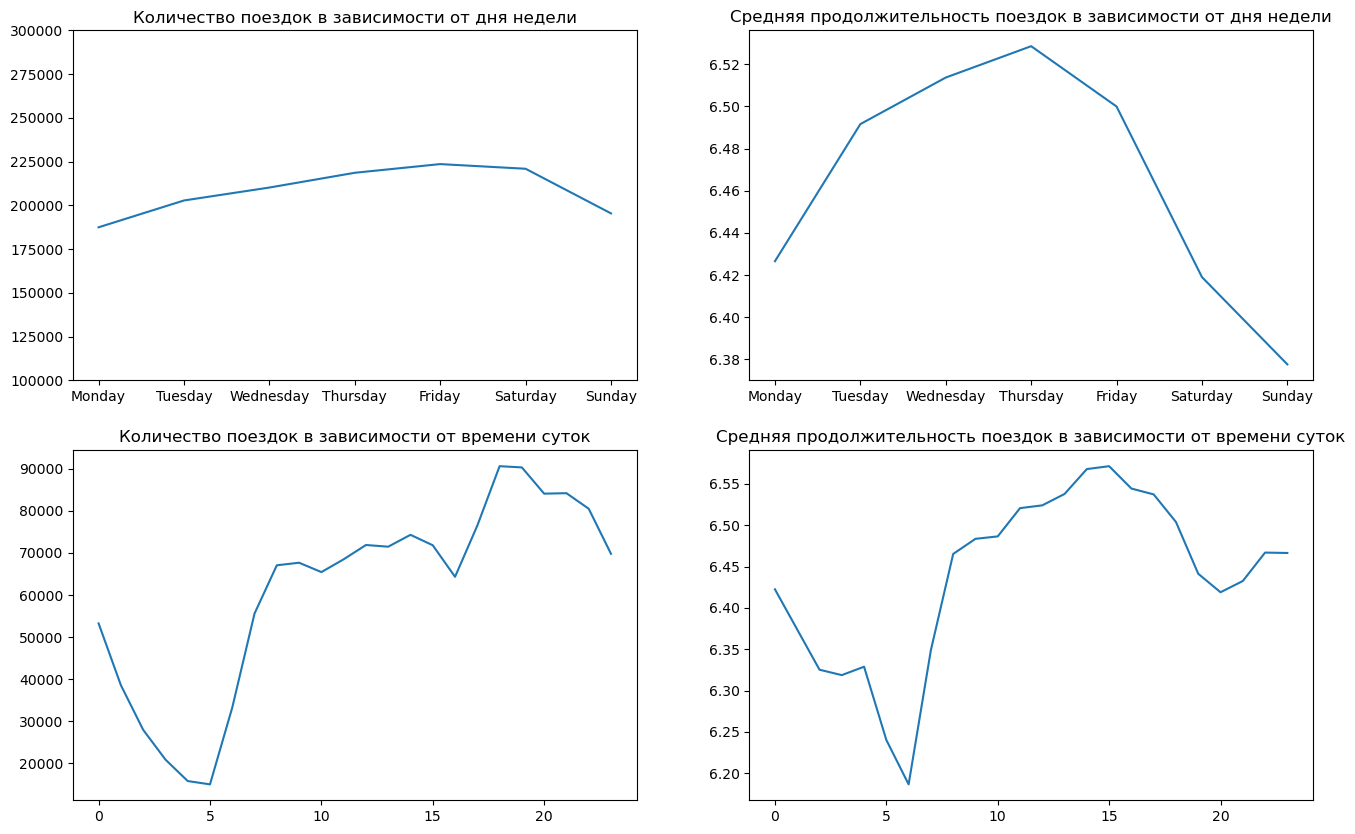

In [9]:
### Your code is here

fig = plt.figure()
fig.set_size_inches(16, 10)


# Количество поездок в зависимости от дня недели
x = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
y = processed_data.groupby('day_of_week', as_index=False).count()['vendor_id']
ax_1 = fig.add_subplot(2, 2, 1)
plt.plot(x, y)
plt.ylim((100000, 300000))


# Средняя продолжительность поездок в зависимости от дня недели
y = processed_data.groupby('day_of_week', as_index=False)['log_trip_duration'].mean()['log_trip_duration']
ax_2 = fig.add_subplot(2, 2, 2)
plt.plot(x, y)

# Количество поездок в зависимости от времени суток
x = sorted(processed_data['hour'].unique())
y = processed_data.groupby('hour', as_index=False)['vendor_id'].count()['vendor_id']
ax_3 = fig.add_subplot(2, 2, 3)
plt.plot(x, y)


# Средняя продолжительность поездок в зависимости от времени суток
y = processed_data.groupby('hour', as_index=False)['log_trip_duration'].mean()['log_trip_duration']
ax_4 = fig.add_subplot(2, 2, 4)
plt.plot(x, y)


ax_1.set(title = 'Количество поездок в зависимости от дня недели')
ax_2.set(title = 'Средняя продолжительность поездок в зависимости от дня недели')
ax_3.set(title = 'Количество поездок в зависимости от времени суток')
ax_4.set(title = 'Средняя продолжительность поездок в зависимости от времени суток')

plt.show()

In [10]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


In [11]:
processed_data.groupby('day_of_week', as_index=False).count()['vendor_id']

0    187418
1    202749
2    210136
3    218574
4    223533
5    220868
6    195366
Name: vendor_id, dtype: int64

In [12]:
sorted(processed_data['day_of_week'].unique())

[0, 1, 2, 3, 4, 5, 6]

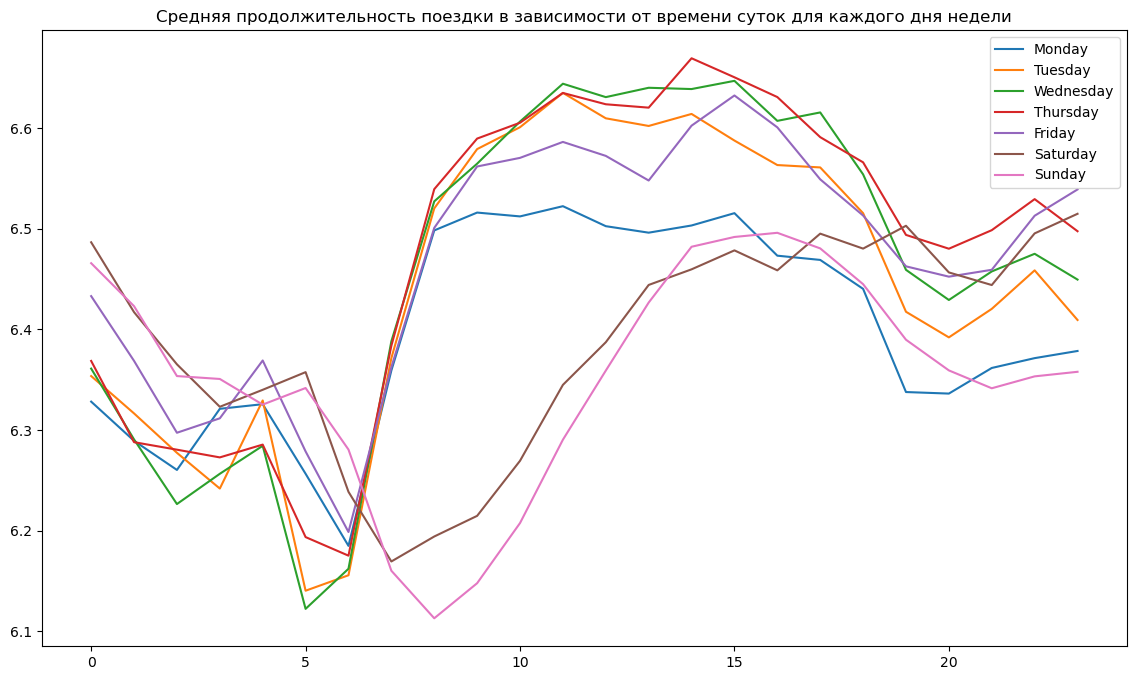

In [13]:
fig = plt.figure()
fig.set_size_inches(14, 8)


for i in range(0, 6+1):
    x = sorted(processed_data[processed_data['day_of_week'] == i]['hour'].unique())
    y = processed_data[processed_data['day_of_week'] == i].groupby('hour', as_index=False)['log_trip_duration'].mean()['log_trip_duration']
    plt.plot(x, y)

plt.legend(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Средняя продолжительность поездки в зависимости от времени суток для каждого дня недели')

plt.show()

In [14]:
sorted(processed_data['month'].unique())

[1, 2, 3, 4, 5, 6]

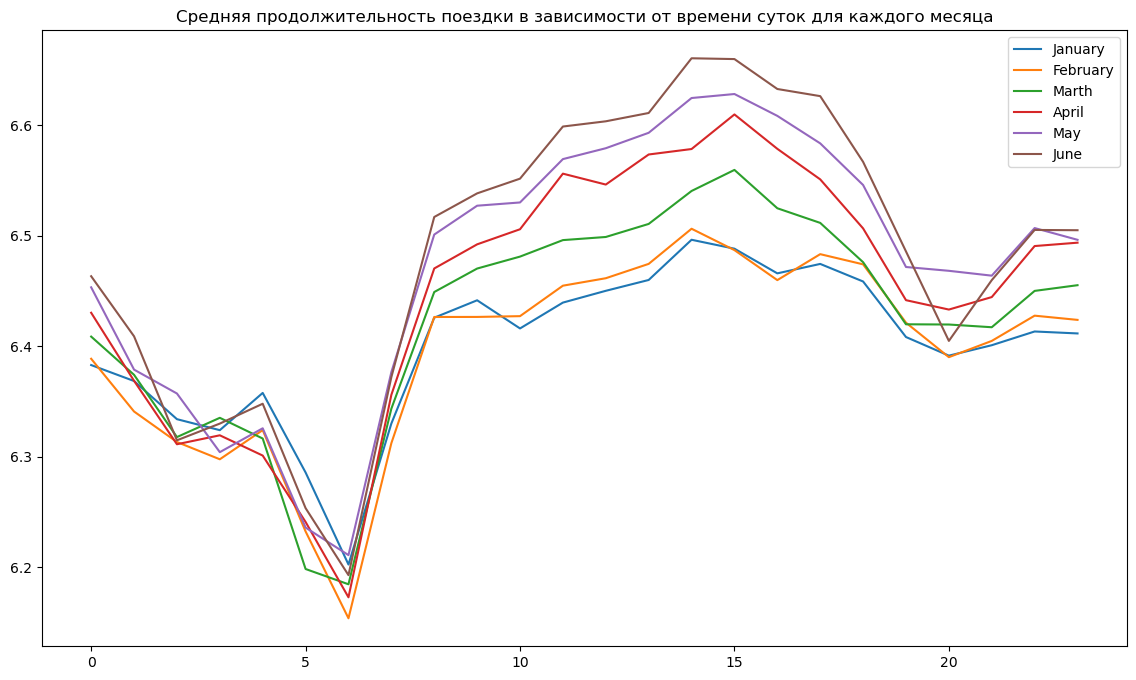

In [15]:
fig = plt.figure()
fig.set_size_inches(14, 8)


for i in range(1, 6+1):
    x = sorted(processed_data[processed_data['month'] == i]['hour'].unique())
    y = processed_data[processed_data['month'] == i].groupby('hour', as_index=False)['log_trip_duration'].mean()['log_trip_duration']
    plt.plot(x, y)


plt.legend(['January', 'February', 'Marth', 'April', 'May', 'June'])
plt.title('Средняя продолжительность поездки в зависимости от времени суток для каждого месяца')

plt.show()

In [16]:
import seaborn as sns

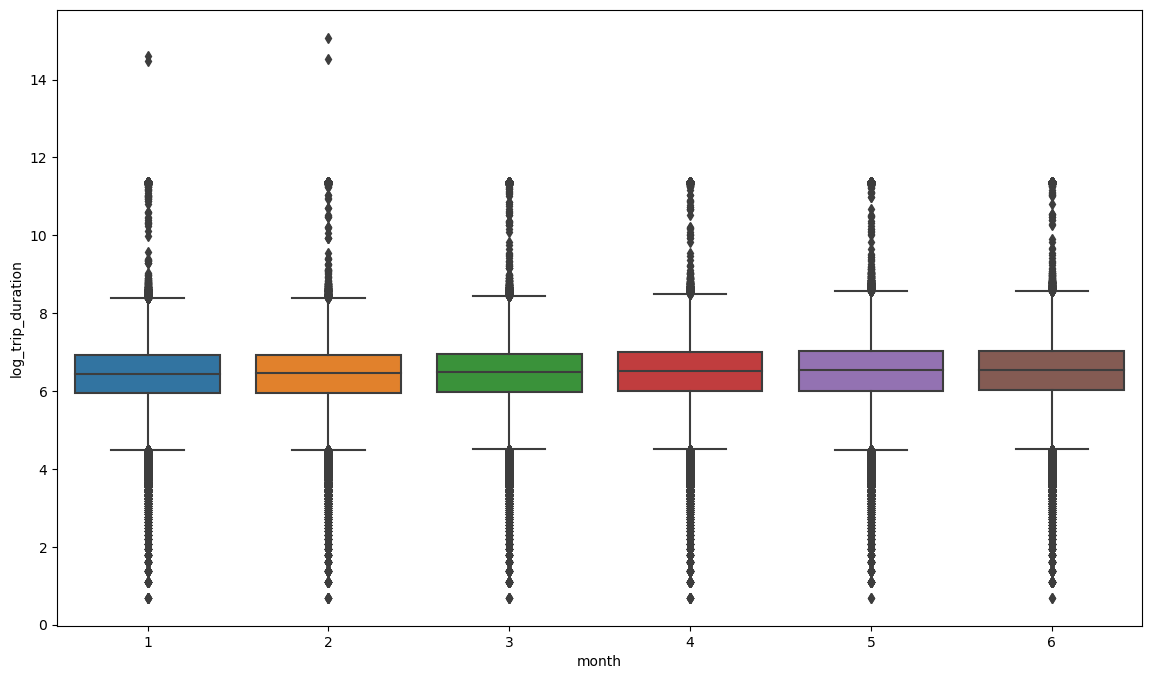

In [17]:
fig = plt.figure()
fig.set_size_inches(14, 8)

data = processed_data

sns.boxplot(x='month', y='log_trip_duration', data=data)

plt.show()

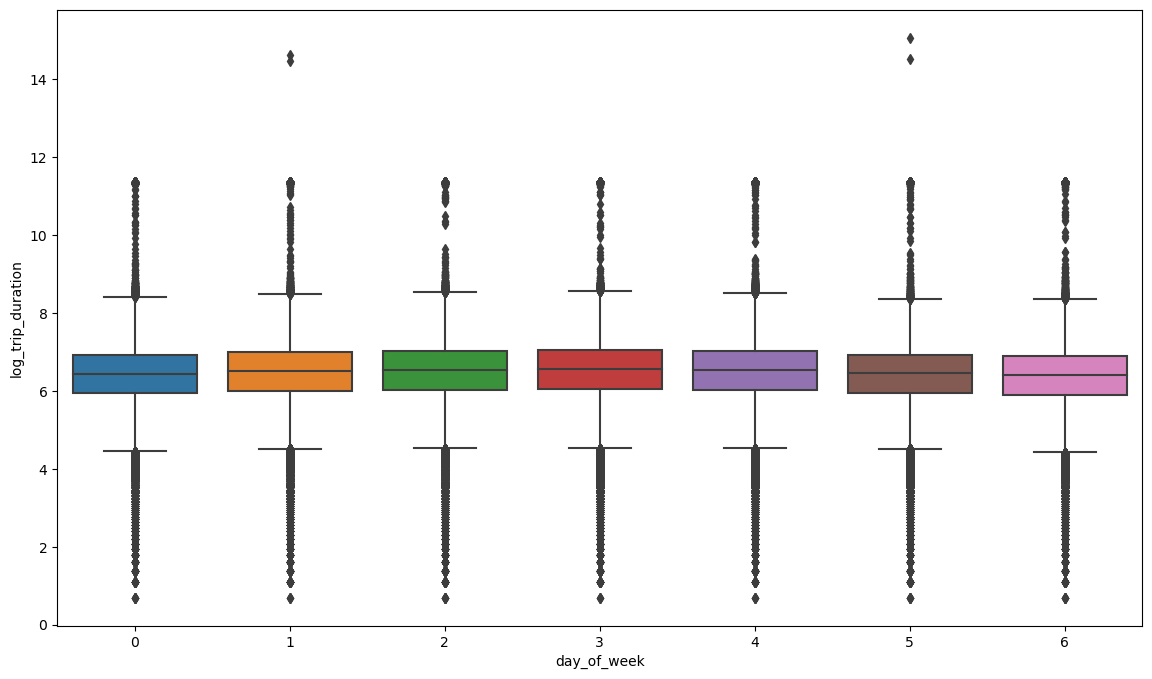

In [18]:
fig = plt.figure()
fig.set_size_inches(14, 8)

data = processed_data

sns.boxplot(x='day_of_week', y='log_trip_duration', data=data)

plt.show()

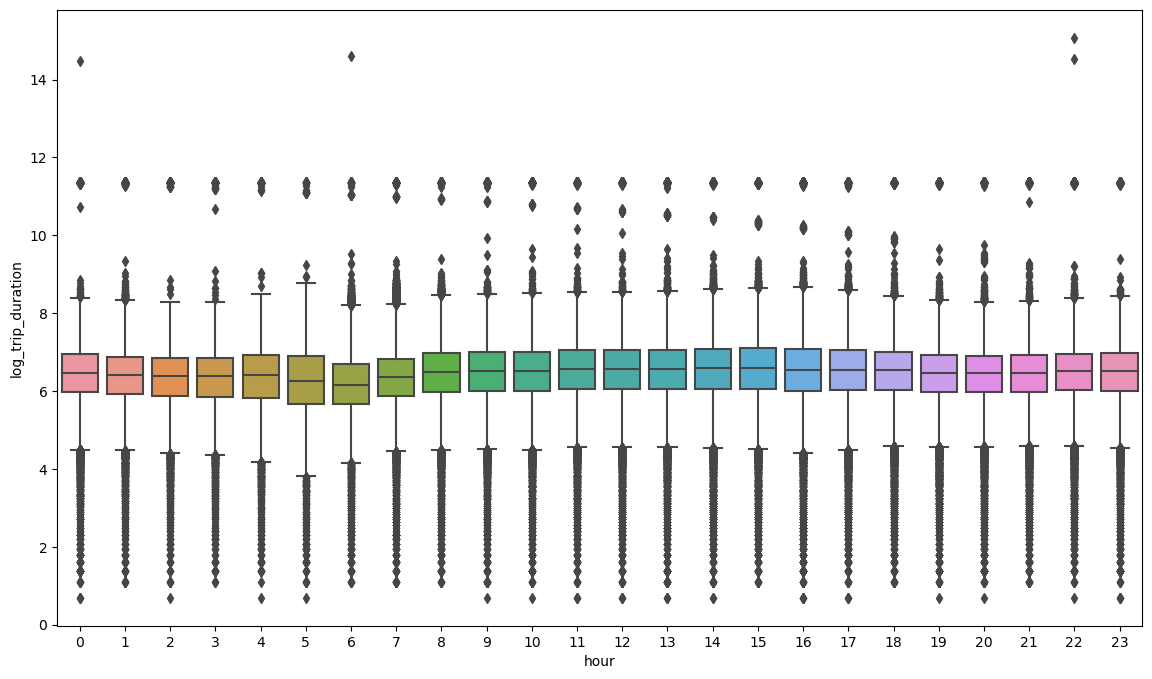

In [19]:
fig = plt.figure()
fig.set_size_inches(14, 8)

data = processed_data

sns.boxplot(x='hour', y='log_trip_duration', data=data)

plt.show()

Кажется, что полученные выводы из графиков выше достаточны для того, чтобы посчитать признаки, связанные с временем/датой поездки, достаточно важными. На их основе выделим еще пару.

Добавьте следующие бинарные признаки:


1. Была ли в день поездки буря (основываясь на единственном обнаруженном таком дне)
2. Является ли время поездки статистически самым проблемным, то есть час пиком?

Для создания 2ой фичи используйте следующую логику: посчитаем для каждой пары "день недели"-"время суток" среднее значение таргета. Найдем топ-10 самых "больших" пар. Если поездка была совершена во входящее в этот топ время, то ставим 1. Иначе - 0. Получается бинарный признак.

P.S. назовите колонки **anomaly** и **traffic_jam**

In [20]:
### Создадим первый бинарный признак
### Your code is here
processed_data['anomaly'] = 0
processed_data.loc[processed_data.date.apply(str)=='2016-01-23', 'anomaly'] = 1


In [21]:
### Создадим второй бинарный признак
### Your code is here
frame = processed_data.groupby(['day_of_week', 'hour'], as_index=False)['log_trip_duration'].mean()
frame = frame.pivot(index='hour', columns='day_of_week', values='log_trip_duration')

processed_data['traffic_jam'] = 0

for x in frame.unstack().sort_values(ascending=False).index[:10]:

    processed_data.loc[(processed_data.day_of_week==x[0])&(processed_data.hour==x[1]), 'traffic_jam'] = 1

In [22]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly,traffic_jam
id,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,0,0
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,0,0
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,0,0
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3,0,0


Теперь колонки **pickup_datetime**, **date** можно убрать. А про оставшиеся **day_of_week**, **hour**, **month** необходимо подумать:

- С одной стороны, первые две можно убрать, так как на их основе была создана колонка **traffic_jam**
- С другой стороны, зависимость с колонкой **traffic_jam** нелинейная, поэтому можно попробовать использовать все фичи в комбинации. Конечно, лучше попробовать оба варианта и проэкспериментировать, но ради упрощения - оставим все колонки. Хоть **day_of_week**, **hour** и описываются числами, мы понимаем, что это скорее категориальные фичи. Потому что, например, отношение между 23:00 и 00:00 не такое же, как между числами 23 и 0. Закодируем их с помощью OneHotEncoder. 
- Последняя (**month**) очевидно категориальная. Можно закодировать ее тоже через OneHotEncoder.

In [23]:
processed_data = processed_data.drop(['pickup_datetime', 'date'], axis=1)

In [24]:
### Делаем OneHotEncoding и конкатим с processed_data
### Your code is here
for col in ['day_of_week', 'hour', 'month']:
    onehot = pd.get_dummies(processed_data[col], drop_first=True).astype(int)
    onehot.columns = [f"{col}_{x}" for x in onehot.columns]
    
    processed_data = pd.concat((processed_data, onehot), axis=1)
    processed_data = processed_data.drop(col, axis=1)

In [25]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [26]:
processed_data.head(5).to_csv('task_4.csv', sep=',')

Что же, мы с Вами научились с помощью EDA визуализаций понимать важность признаков не только постфактум, но и до того, как сформировался финальный датасет - на этапе **выделения базовых фичей**.

Обратимся теперь к методам фильтрации - например, применим корреляционный анализ для одной пары фичей, чтобы понять, нет ли относительно этих колонок в нашем датасете избытка информации. 

Вспомним так же изначальные вещественные признаки - distance_km, passenger_count

Посчитайте корреляцию между ними. Есть ли какие-то основания для беспокойства?

In [27]:
### Your code is here
processed_data[['distance_km', 'passenger_count']].corr()

,distance_km,passenger_count
distance_km,1.000000,0.016596
passenger_count,0.016596,1.000000


In [28]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [29]:
### На данный момент у нас 41 фича
### Представим, что хочется сократить их количество до 5.
### Воспользуемся для этим каким-нибудь методом обертки
### Например, метод прямого отбора

### Your code is here
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
X = processed_data.drop('log_trip_duration', axis=1)
Y = processed_data['log_trip_duration']

model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select=5)
sfs.fit(X,Y)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5)

In [30]:
### Перечислите фичи, которые окажутся наиболее желанными
### Your code is here
sfs.get_feature_names_out()

array(['distance_km', 'traffic_jam', 'day_of_week_6', 'hour_5', 'hour_6'],
      dtype=object)

In [31]:
### Представим, что мы с Вами ничего не знаем про Кросс-Валидацию и отложенную выборку
### Замерьте качество линейной регрессии на данных фичах
### Сильно ли оно отличается от полученного на Кросс-Валидации в прошлом уроке в ДЗ?
### Your code is here
from sklearn.metrics import mean_squared_error as mse

X = processed_data[['distance_km', 'traffic_jam', 'day_of_week_6', 'hour_5', 'hour_6']]
Y = processed_data['log_trip_duration']

model.fit(X, Y)
mse(model.predict(X), Y)

0.4154000234078256